# Analysis of genre popularity based on the Kaggle platform's database 'Spotify HUGE database - daily charts over 3 years

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import 
%matplotlib inline
pd.set_option('display.max_columns', 151)

### Loading data

source: https://www.kaggle.com/datasets/pepepython/spotify-huge-database-daily-charts-over-3-years?select=Final+database

In [69]:
#Importing the database with selected columns
df = pd.read_csv('../Orginal_database_from_Kaggle/Final database.csv', usecols=['Country', 'Popularity', 'Genre'])
df_1 = pd.read_csv('../Orginal_database_from_Kaggle/Final database.csv', usecols=['Country', 'Genre', 'Artist','Title','Album'])
df_country_iso = pd.read_csv(r'..\Country_ISO\countries_codes_and_coordinates.csv') # wczytanie i stworznie do pracy kolmuny z oznaczniem iso krajów do plotly
df_country_iso = df_country_iso.replace('"','', regex=True)  #usunięcie nadmienrgo znaku

### Data exploration and identification of basic issues

In [70]:
kraj = list(df_country_iso['Country']) #wyciągnięcie krajów z iso
kraj
iso = list(df_country_iso['Alpha-3 code']) #wyciągnięcie skrótów krajów z iso
iso
dict = {}
iso = [x.strip(' ') for x in iso] # usnięcie spacji ze skrótów kodów
for i,j in zip(kraj,iso): # tworznie słownika na bazie którego zostanie zapełniona kolumna iso_alpha z df
    dict.setdefault(i,j)

In [71]:
df['iso_alpha'] = df['Country'] #dodanie kolmuny iso_alpha z wartościami Country aby dokonać podmiany na trzy literowen zonaczenie

df.replace({"iso_alpha": dict},inplace=True) # podmiana wartosci iso_alpha na ich odpowiednik 3 literowy potrzbne do wykrzystania w plotly do wyświetlania potrzbenych krajów

In [72]:
df.head()

,Country,Popularity,Genre,iso_alpha
0,Global,31833.95,argentine hip hop,Global
1,USA,8.00,argentine hip hop,USA
2,Argentina,76924.40,argentine hip hop,ARG
3,Belgium,849.60,argentine hip hop,BEL
4,Switzerland,20739.10,argentine hip hop,CHE


In [59]:
# mean to show on map
by_country = df.groupby('iso_alpha')['Popularity'].mean().reset_index().rename(columns={'iso_alpha': 'Country'})

In [102]:
old_df = pd.DataFrame({'Countries': [Counutries],'Genres':[Genres], 'Artist': [Artist] , 'Albums':[Albums], 'Title': [Titles],})
old_df.style.hide_index()

C:\Users\Data\AppData\Local\Temp\ipykernel_100668\613325176.py:2: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



Countries,Genres,Artist,Albums,Title
35,1120,25524,34696,47045


In [77]:
Counutries = df_1['Country'].nunique()
Genres = df_1['Genre'].nunique()
Titles = df_1['Title'].nunique()
Albums = df_1['Album'].nunique()
Artist = df_1['Artist'].nunique()
df_counts = 

48165

## Map of mean popularity

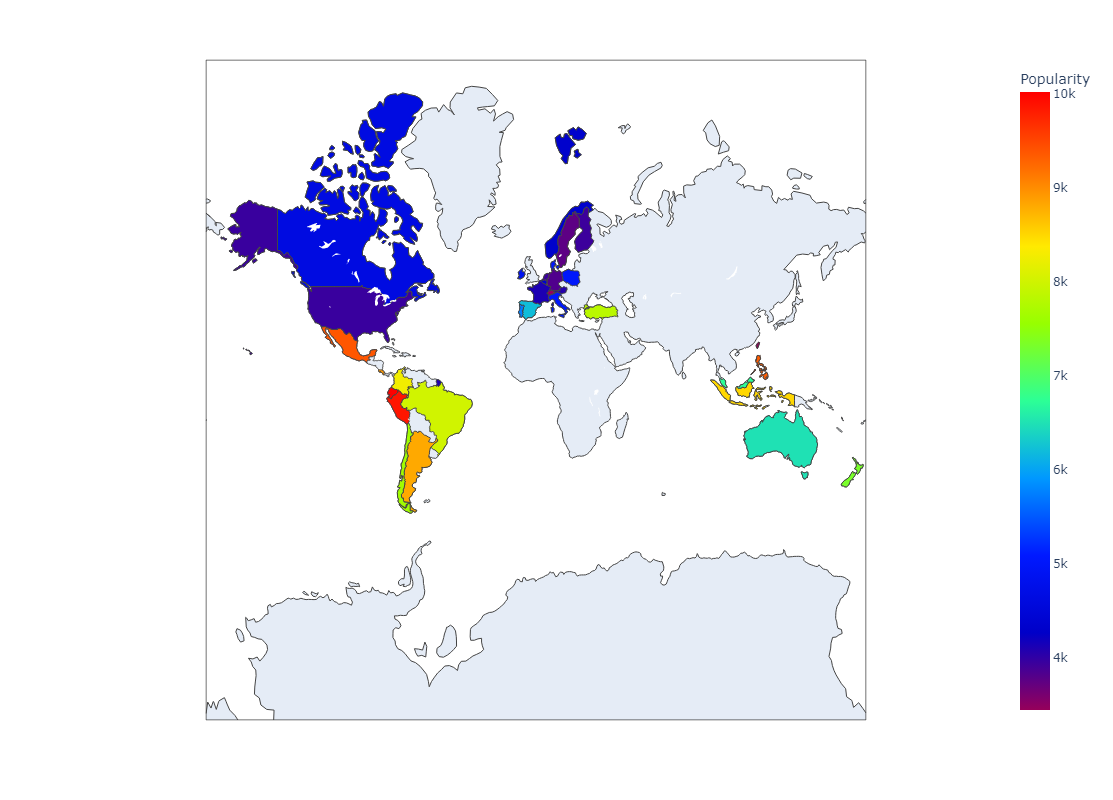

In [47]:
country_list = by_country
fig = px.choropleth(country_list, locations="Country",
                        color="Popularity", # lifeExp is a column of gapminder
                        hover_name="Country", # column to add to hover information
                        color_continuous_scale=px.colors.sequential.Rainbow,
                        width=800,
                        height=800,
                        projection = 'mercator')
fig.show()

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Country     170633 non-null  object 
 1   Popularity  170633 non-null  float64
 2   Genre       170633 non-null  object 
dtypes: float64(1), object(2)
memory usage: 3.9+ MB


In [109]:
df.describe()

,Popularity
count,170633.000000
mean,5417.616264
std,13115.854526
min,0.800000
25%,77.600000
50%,515.150000
75%,3867.850000
max,233766.900000


In [110]:
df.isna().sum()

Country       0
Popularity    0
Genre         0
dtype: int64

In [111]:
# Finding out that the database contains 3952 "n-a" values

df['Genre'].value_counts()

dance pop         25351
latin              7591
pop                7146
k-pop              4053
n-a                3952
                  ...  
azonto                1
french reggae         1
bubblegum pop         1
pop venezolano        1
chinese manyao        1
Name: Genre, Length: 1120, dtype: int64

### Data cleansing

In [188]:
#Removing "n-a" values

df = df.replace('n-a', np.nan)
df = df.dropna()

In [189]:
#Checking if a column contains "n/a" values

df['Genre'].value_counts()

dance pop         25351
latin              7591
pop                7146
k-pop              4053
german hip hop     3834
                  ...  
azonto                1
french reggae         1
bubblegum pop         1
pop venezolano        1
chinese manyao        1
Name: Genre, Length: 1119, dtype: int64

### Data analysis

In [114]:
#How many unique music genres are in the database?

unique_genre_count = df['Genre'].nunique()
unique_genre_count

1119

In [115]:
#How many occurrences of each music genre are there in total in a given country?

count_genre2 = df.groupby('Country')['Genre'].nunique()
count_genre2

Country
Argentina      143
Australia      215
Austria        292
Belgium        277
Brazil         139
Canada         232
Chile          165
Colombia       156
Costa Rica     166
Denmark        230
Ecuador        166
Finland        257
France         211
Germany        268
Global         256
Indonesia      171
Ireland        283
Italy          209
Malaysia       212
Mexico         176
Netherlands    263
New Zealand    207
Norway         299
Peru           148
Philippines    158
Poland         253
Portugal       257
Singapore      206
Spain          213
Sweden         317
Switzerland    289
Taiwan         300
Turkey         185
UK             297
USA            218
Name: Genre, dtype: int64

In [116]:
# Which countries have the greatest musical diversity? Top 5

unique_genre_counts = fd.groupby('Country')['Genre'].nunique().nlargest(10)
unique_genre_counts

Country
Sweden         318
Taiwan         301
Norway         300
UK             298
Austria        293
Switzerland    290
Ireland        284
Belgium        278
Germany        269
Netherlands    264
Name: Genre, dtype: int64

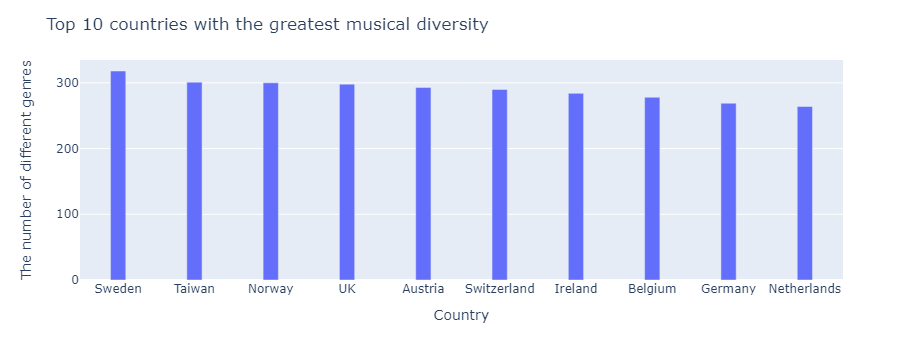

In [130]:
fig = px.bar(x=unique_genre_counts.index, y=unique_genre_counts.values, labels={'x':'Country', 'y':'The number of different genres'})
fig.update_layout(title='Top 10 countries with the greatest musical diversity')
fig.update_traces(width=0.2)
fig.show()

In [136]:
#Which genre is the most commonly listened to in a given country? Number of occurrences

result = df.groupby('Country')['Genre'].apply(lambda x: x.value_counts().nlargest(1))
result

Country                       
Argentina    latin                 619
Australia    dance pop             808
Austria      german hip hop       1119
Belgium      dance pop             859
Brazil       dance pop             591
Canada       dance pop             849
Chile        latin                1107
Colombia     latin                 845
Costa Rica   latin                 667
Denmark      danish hip hop       1059
Ecuador      latin                 793
Finland      finnish dance pop    2138
France       francoton            2332
Germany      german hip hop       1544
Global       dance pop             909
Indonesia    dance pop             530
Ireland      dance pop            1172
Italy        italian hip hop      1829
Malaysia     dance pop             821
Mexico       latin                 632
Netherlands  dutch hip hop        2690
New Zealand  dance pop             740
Norway       dance pop            1199
Peru         latin                 774
Philippines  dance pop           

In [170]:
#Which music genres are the most popular in Poland? Number of occurrences - top 10
poland_counts = df.query('Country == "Poland"')['Genre'].value_counts().nlargest(10)
poland_counts

polish hip hop        1342
dance pop              873
pop                    205
polish alternative     191
modern rock            106
big room               101
art pop                 98
emo rap                 91
alternative metal       89
polish pop              86
Name: Genre, dtype: int64

In [171]:
#Which music genres are the most popular in Taiwan? Number of occurrences - top 10
taiwan_counts = df.query('Country == "Taiwan"')['Genre'].value_counts().nlargest(10)
taiwan_counts

dance pop               1143
mandopop                 949
k-pop                    608
c-pop                    541
chinese indie            420
pop                      320
big room                 261
mainland chinese pop     205
taiwan pop                81
canadian pop              80
Name: Genre, dtype: int64

In [172]:
#Which music genres are the most popular in Ecuador? Number of occurrences - top 10
ecuador_counts = df.query('Country == "Ecuador"')['Genre'].value_counts().nlargest(10)
ecuador_counts

latin                793
dance pop            337
colombian pop        254
pop                   78
reggaeton             73
k-pop                 71
latin pop             63
argentine hip hop     56
boy band              43
big room              36
Name: Genre, dtype: int64

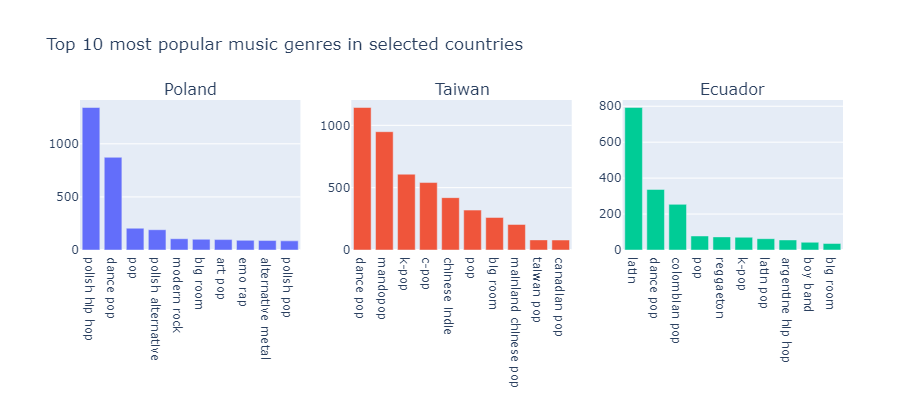

In [193]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Poland", "Taiwan", "Ecuador"))

fig.add_trace(go.Bar(x=poland_counts.index, y=poland_counts), row=1, col=1)
fig.add_trace(go.Bar(x=taiwan_counts.index, y=taiwan_counts), row=1, col=2)
fig.add_trace(go.Bar(x=ecuador_counts.index, y=ecuador_counts), row=1, col=3)

fig.update_layout(height=400, width=900,
                  title_text="Top 10 most popular music genres in selected countries", showlegend=False)

fig.show()

In [173]:
#Which music genres are the most popular in the database? Number of occurrences - top 10

genre_counts = df['Genre'].value_counts().nlargest(10)
genre_counts

dance pop         25351
latin              7591
pop                7146
k-pop              4053
german hip hop     3834
atl hip hop        3668
francoton          3279
dutch hip hop      3257
big room           3095
hip hop            3063
Name: Genre, dtype: int64

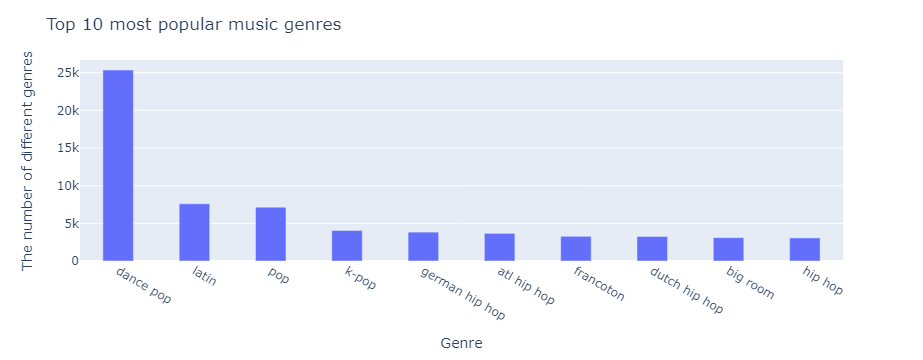

In [174]:
fig = px.bar(x=genre_counts.index, y=genre_counts, labels={'x':'Genre', 'y':'The number of different genres'})
fig.update_layout(title='Top 10 most popular music genres')
fig.update_traces(width=0.4)
fig.show()

Please enter the name of the country for which you would like to see the top 15 music genres:  Taiwan


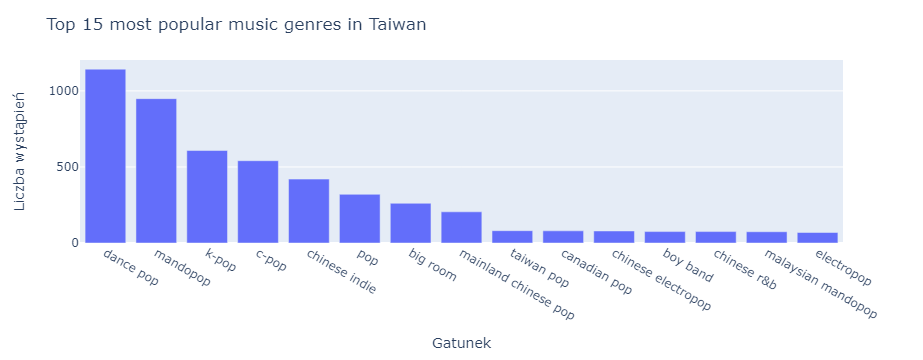

In [194]:
#Display the top 10 most popular music genres for the selected country

Wprowadź_kraj = input("Please enter the name of the country for which you would like to see the top 15 music genres: ")
nowy_df = df.loc[fd['Country'] == Wprowadź_kraj, ['Genre', 'Country']]
zliczanie = nowy_df['Genre'].value_counts()
zliczanie.columns = ['Genre', 'Counts'] 
top5_counts = nowy_df['Genre'].value_counts().nlargest(15).reset_index().rename(columns={'Genre': 'Counts', 'index': 'Genre'})

fig = px.bar(nowy_df, x=top5_counts['Genre'], y=top5_counts['Counts'], labels={'x':'Gatunek', 'y':'Liczba wystąpień'})
fig.update_layout(title=f"Top 15 most popular music genres in {Wprowadź_kraj}")
fig.show()